# NYC Trip Duration Analysis

![](https://github.com/robinyUArizona/NYC-Taxi-Trip-Duration-R-ggplot2/blob/master/NYC-Taxi-Trip-Duration-Pic.PNG?raw=true)

In [1]:
#### New York Taxi trip duration ####

#### Libraries or Packages #####################################
# install.packages('dplyr') 
# install.packages('lubridate')
# install.packages('vcd')
# install.packages('ggplot2')
# install.packages('gridExtra')
# install.packages('geosphere')
# install.packages('caret')
# install.packages('ellipse')
# install.packages('e1071')
# install.packages('class')
# install.packages('klaR')


In [2]:
## load packages
library(dplyr)
library(lubridate) # for date-time formatting
library(vcd) # for distribution plot
library(ggplot2) # for visualisation
library(gridExtra) # for grid for multiplot
library(geosphere)
library(caret)
library(ellipse)
library(e1071) # for svm
library(class) # for knn
library(klaR) # for nb-naiveBayes
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'vcd' was built under R version 3.6.3"Loading required package: grid
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"package 'geosphere' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'ellipse' was built under R version 3.6.3

In [3]:
#################################################################

# train_data <- read.csv('train.csv')
# 
# set.seed(123)
# sample_size <- 70000
# sample_train_data <- train_data[sample(nrow(train_data), size=sample_size,
#                             replace=FALSE), ]
# 
# ## Save sample_train_data as 'sample_train.csv' file
# write.csv(sample_train_data, "sample_train.csv", row.names = FALSE)

In [4]:
new_train_data <- read.csv('sample_train.csv')
cat('Dimension of Sample Train Data: \n')
print(dim(new_train_data))
cat('Column Names: \n')
print(colnames(new_train_data))

Dimension of Sample Train Data: 
[1] 70000    11
Column Names: 
 [1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"     


In [5]:
## Check for missing value
cat('Check for missing value: \n')
print(sum(is.na(new_train_data)))
cat('check missing value in each column: \n')
print(colSums(is.na(new_train_data)))


Check for missing value: 
[1] 0
check missing value in each column: 
                id          vendor_id    pickup_datetime   dropoff_datetime 
                 0                  0                  0                  0 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
                 0                  0                  0                  0 
  dropoff_latitude store_and_fwd_flag      trip_duration 
                 0                  0                  0 


In [6]:
## Summary of data
# cat('Summary of New Train Data: \n')
# print(summary(new_train_data))
cat('Origina Data Format: \n')
print(str(new_train_data))

Origina Data Format: 
'data.frame':	70000 obs. of  11 variables:
 $ id                : Factor w/ 70000 levels "id0000003","id0000023",..: 49664 8613 69213 68729 55700 35130 58637 53179 47855 66101 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : Factor w/ 69805 levels "2016-01-01 00:01:01",..: 61853 36201 18131 39258 15901 39772 43253 17290 29266 20824 ...
 $ dropoff_datetime  : Factor w/ 69814 levels "2016-01-01 00:07:49",..: 61852 36206 18128 39268 15901 39776 43249 17284 29280 20825 ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : int  1034 422 93 1518 532 303 239 263 581 387 ...
NULL


In [7]:
#### Formatting Features: #####################################################
## 'pickup_datetime' and 'dropoff_datetime'
# convert 'Factor' into 'data/time' data type
new_train_data$pickup_datetime <- ymd_hms(new_train_data$pickup_datetime)
new_train_data$dropoff_datetime <- ymd_hms(new_train_data$dropoff_datetime)

## formatting feature 'store_and_fwd_flag'
# convert 'Factor' to 'numeric' data type
new_train_data$store_and_fwd_flag <- as.numeric(as.factor(new_train_data$store_and_fwd_flag))

# cat('Summary after data formatting: \n')
# print(summary(new_train_data))
cat('List the types of Attributes: \n')
print(str(new_train_data))

#######################################################################################

List the types of Attributes: 
'data.frame':	70000 obs. of  11 variables:
 $ id                : Factor w/ 70000 levels "id0000003","id0000023",..: 49664 8613 69213 68729 55700 35130 58637 53179 47855 66101 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : POSIXct, format: "2016-06-09 08:28:09" "2016-04-04 13:25:16" ...
 $ dropoff_datetime  : POSIXct, format: "2016-06-09 08:45:23" "2016-04-04 13:32:18" ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: num  1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : int  1034 422 93 1518 532 303 239 263 581 387 ...
NULL


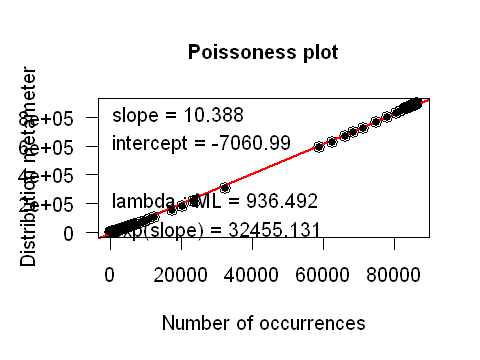

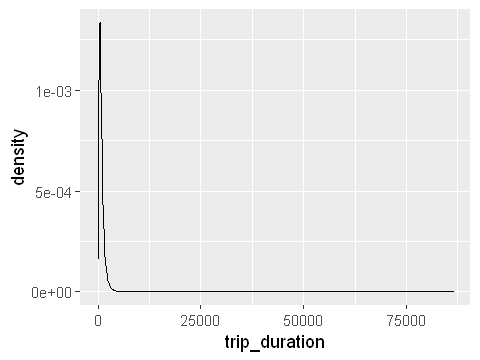

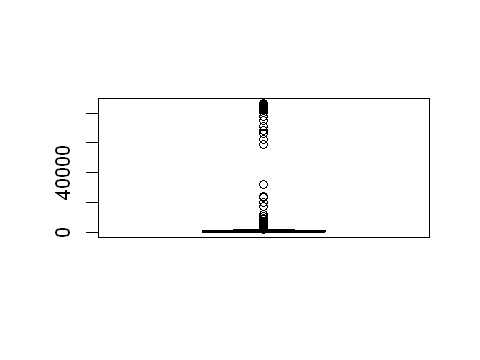

In [8]:
## formatting target variable 'trip_duration'
# Dr. Zhang suggestion comment, "Since we mainly use classification- 
# methods, I suggest you convert your Ride Duration to Long/Short."

#### Some plots to decide where to cutoff for short and long -- 'trip_duration' ####
# distribution plot
distplot(new_train_data$trip_duration)

# density plot
dens_dist <- ggplot(new_train_data, aes(x=trip_duration)) +
  geom_density()
dens_dist

# boxplot
boxplot(new_train_data$trip_duration)

In [9]:
## 'Distance Travelled during each Trip' using
# 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' features

i  <- cbind(pick_longitude = new_train_data$pickup_longitude,
            pick_latitude = new_train_data$pickup_latitude)
j <- cbind(drop_longitude = new_train_data$dropoff_longitude,
           drop_latitude = new_train_data$dropoff_latitude)

#computing haversine distance from co-ordinates
new_train_data$distance <- distHaversine(i, j)

In [10]:
summary_trip_duration <- summary(new_train_data$trip_duration)
# print(summary_trip_duration)
median_trip_duration <- summary_trip_duration['Median']
max_trip_duration <- summary_trip_duration['Max.']
cat('Median of trip_duration in Seconds: ')
print(median_trip_duration)

Median of trip_duration in Seconds: Median 
   662 


In [11]:
cat('Changing regression problem to classification problem: \n')
new_train_data$trip_duration <- cut(new_train_data$trip_duration,
                                    breaks=c(0, 6000, max_trip_duration),
                                    labels=c("Short Trip","Long Trip"))

Changing regression problem to classification problem: 


In [12]:
##
## Analyis of "trip_duration" target/dependent variable
cat('Summary of Trip Duration: \n')
print(summary(new_train_data$trip_duration))

Summary of Trip Duration: 
Short Trip  Long Trip 
     69887        113 


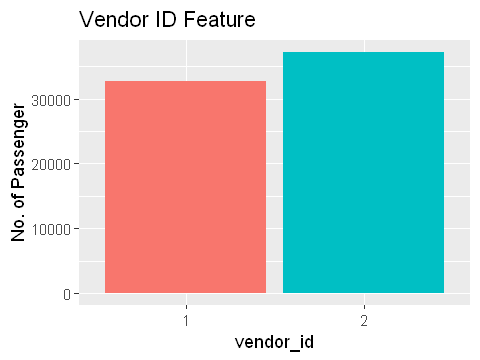

In [13]:
## Analysis of independent variable features

# 'vender_id' feature
new_train_data %>%
  group_by(vendor_id) %>%
  count() %>%
  ggplot(aes(x=factor(vendor_id), y=n))+
  geom_col(aes(fill = factor(vendor_id))) +
  ggtitle("Vendor ID Feature") +
  xlab("vendor_id") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")

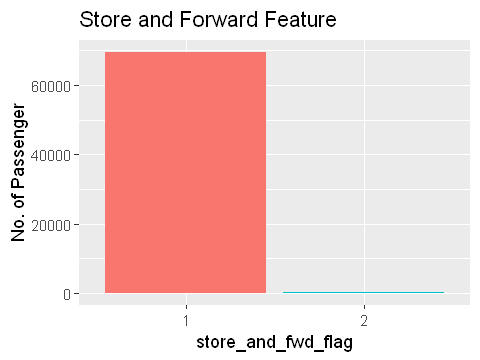

In [14]:
# 'store_and_fwd_flag' feature
new_train_data %>%
  group_by(store_and_fwd_flag) %>%
  count() %>%
  ggplot(aes(x=factor(store_and_fwd_flag), y=n))+
  geom_col(aes(fill = factor(store_and_fwd_flag))) +
  ggtitle("Store and Forward Feature") +
  xlab("store_and_fwd_flag") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")


passenger_count,n
0,2
1,49579
2,10126
3,2830
4,1368
5,3802
6,2293


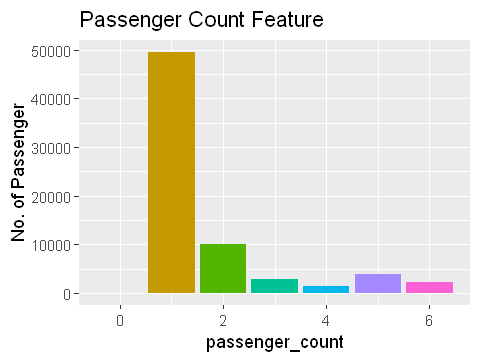

In [15]:
# 'passenger_count' feature
new_train_data_1 <- new_train_data %>%
  group_by(passenger_count) %>%
  count() 
new_train_data_1

new_train_data_1 %>%
  ggplot(aes(x=passenger_count, y=n))+
  geom_col(aes(fill = factor(passenger_count)))+
  ggtitle("Passenger Count Feature") +
  xlab("passenger_count") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")

hour_24,n
0,2577
1,1863
2,1368
3,1059
4,725
5,683
6,1643
7,2673
8,3124
9,3249


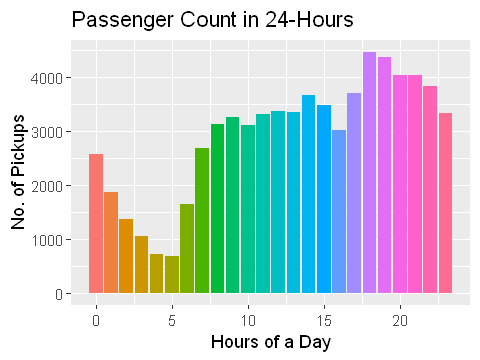

In [16]:
# 'Number of Pickup' in 24-Hours
new_train_data$hour_24 <- hour(new_train_data$pickup_datetime)
new_train_data_2 <- new_train_data %>%
  group_by(hour_24) %>%
  count()
new_train_data_2

new_train_data_2 %>%
  ggplot(aes(x=hour_24, y=n)) +
  geom_col(aes(fill = factor(hour_24))) +
  ggtitle("Passenger Count in 24-Hours") +
  xlab("Hours of a Day") +
  ylab("No. of Pickups") +
  theme(legend.position = "none")


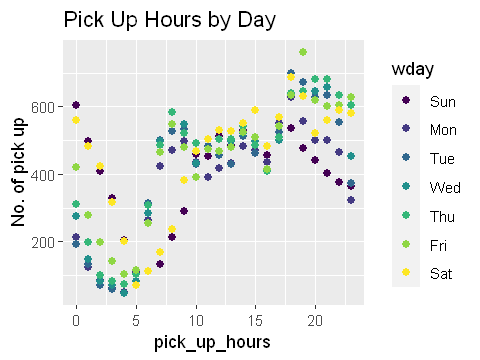

In [17]:
##### 'pick_up_datetime' feature
new_train_data %>%
  mutate(hpick = hour(pickup_datetime),
         wday  = factor(wday(pickup_datetime, label=TRUE))) %>%
  group_by(hpick, wday) %>%
  count() %>%
  ggplot(aes(x=hpick, y=n, color=wday)) +
  geom_point(size=2) +
  ggtitle("Pick Up Hours by Day") +
  xlab("pick_up_hours") +
  ylab("No. of pick up")

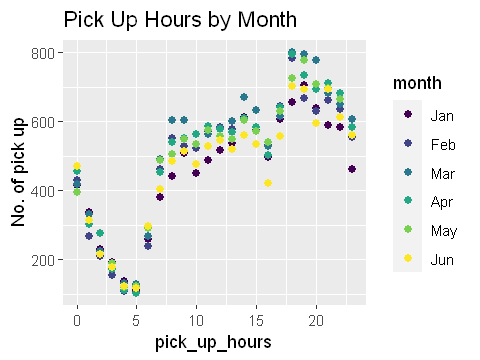

In [18]:
new_train_data %>%
  mutate(hpick = hour(pickup_datetime),
         month  = factor(month(pickup_datetime, label=TRUE))) %>%
  group_by(hpick, month) %>%
  count() %>%
  ggplot(aes(x=hpick, y=n, color=month)) +
  geom_point(size=2) +
  ggtitle("Pick Up Hours by Month") +
  xlab("pick_up_hours") +
  ylab("No. of pick up")


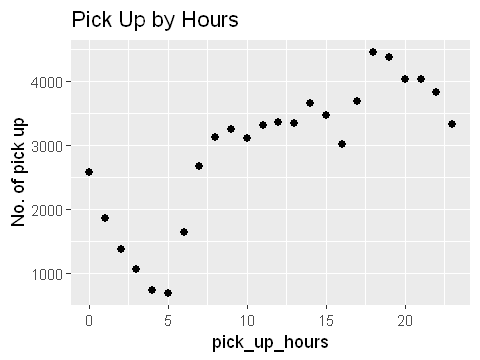

In [19]:
new_train_data %>%
  mutate(hpick = hour(pickup_datetime)) %>%
  group_by(hpick) %>%
  count() %>%
  ggplot(aes(x=hpick, y=n)) +
  geom_point(size=2) +
  ggtitle("Pick Up by Hours") +
  xlab("pick_up_hours") +
  ylab("No. of pick up")
#

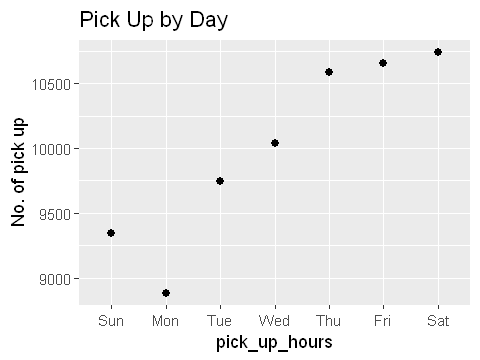

In [20]:
new_train_data %>%
  mutate(wday  = factor(wday(pickup_datetime, label=TRUE))) %>%
  group_by(wday) %>%
  count() %>%
  ggplot(aes(x=wday, y=n)) +
  geom_point(size=2) +
  ggtitle("Pick Up by Day") +
  xlab("pick_up_hours") +
  ylab("No. of pick up")

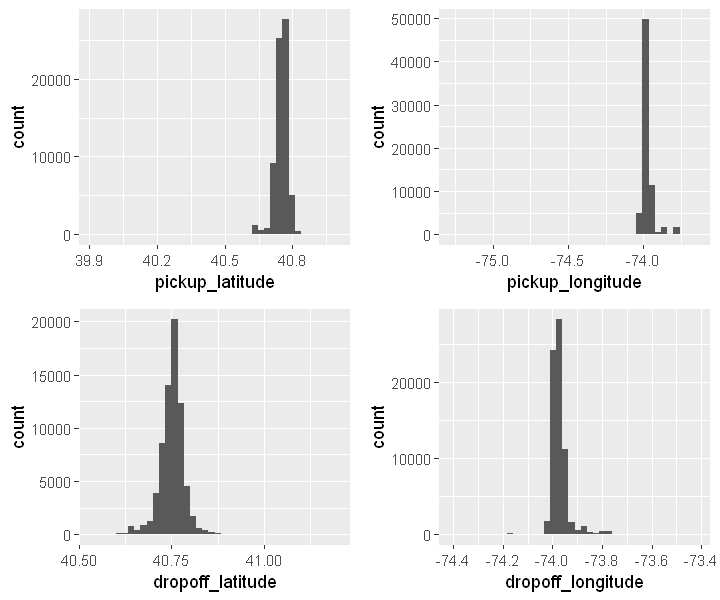

In [21]:
# 'pickup_latitude', pickup_longitude', dropoff_latitude', 'dropoff_longitude' features
options(repr.plot.width = 6, repr.plot.height = 5)
p1 <- new_train_data %>%
  filter(pickup_latitude > min(new_train_data$pickup_latitude) &
          pickup_latitude < max(new_train_data$pickup_latitude)) %>%
  ggplot(aes(x=pickup_latitude)) +
  geom_histogram(bins=40)

p2 <- new_train_data %>%
  filter(pickup_longitude > min(new_train_data$pickup_longitude) &
           pickup_longitude < max(new_train_data$pickup_longitude)) %>%
  ggplot(aes(x=pickup_longitude)) +
  geom_histogram(bins=40)

p3 <- new_train_data %>%
  filter(dropoff_latitude > min(new_train_data$dropoff_latitude) &
           dropoff_latitude < max(new_train_data$dropoff_latitude)) %>%
  ggplot(aes(x=dropoff_latitude)) +
  geom_histogram(bins=40)

p4 <- new_train_data %>%
  filter(dropoff_longitude > min(new_train_data$dropoff_longitude) &
           dropoff_longitude < max(new_train_data$dropoff_longitude)) %>%
  ggplot(aes(x=dropoff_longitude)) +
  geom_histogram(bins=40)

grid.arrange(p1, p2, p3, p4)

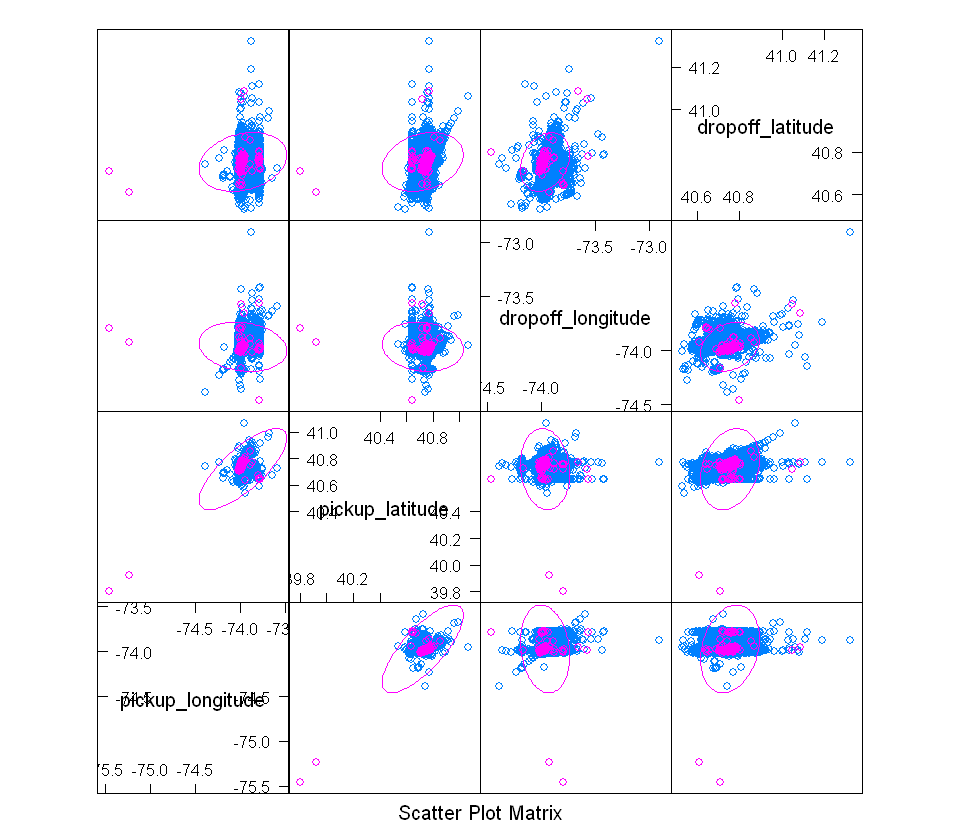

In [22]:
# featuresplot, #scatterplot matrix
options(repr.plot.width = 8, repr.plot.height = 7)
featurePlot(x=new_train_data[,6:9], y=new_train_data[,11], plot="ellipse")


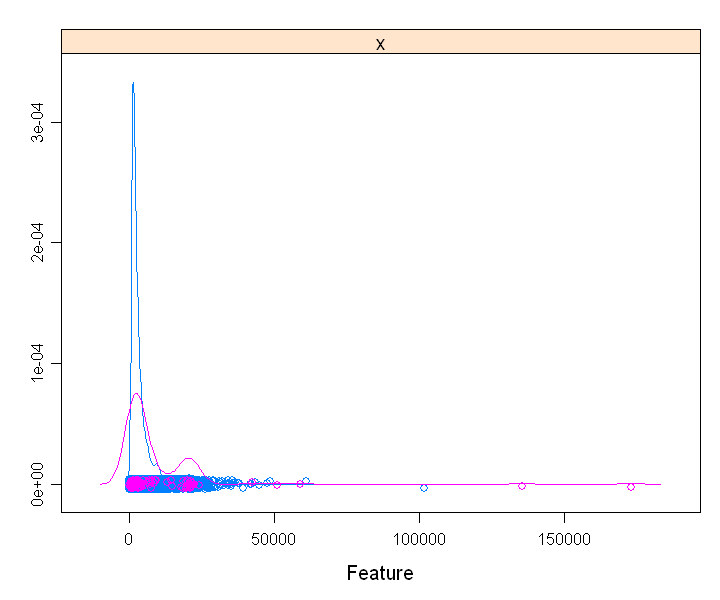

In [23]:
# density plots for each attribute by class value
options(repr.plot.width = 6, repr.plot.height = 5)
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=new_train_data[,12], y=new_train_data[,11], plot="density", scales=scales)

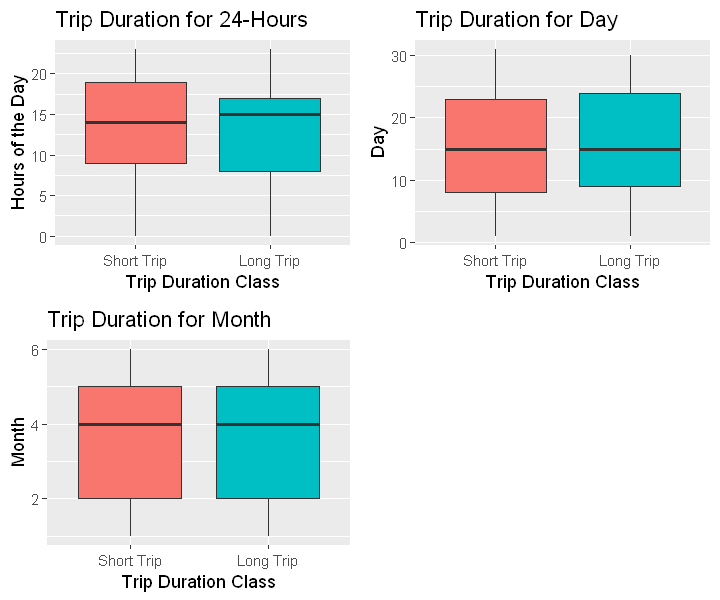

In [24]:
## Relationship between different features with 'trip_duration'
options(repr.plot.width = 6, repr.plot.height = 5)
b1 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=hour(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for 24-Hours") +
  xlab("Trip Duration Class") +
  ylab("Hours of the Day") +
  theme(legend.position="none")

b2 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=day(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Day") +
  xlab("Trip Duration Class") +
  ylab("Day") +
  theme(legend.position="none")

b3 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=month(pickup_datetime),
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Month") +
  xlab("Trip Duration Class") +
  ylab("Month") +
  theme(legend.position="none")

grid.arrange(b1, b2, b3, ncol=2)


In [25]:
###############################################################################################
## Model Preparation

# create a validation dataset from 'new_train_data'
# 70 % 'new_train_data' data
print(colnames(new_train_data))
new_train_data <- new_train_data[, -which(names(new_train_data) 
                                          %in% c("id","distance")) ]
sample_size <- floor(0.7 * nrow(new_train_data))

# randomly select index of observations for training
training_index_2 <- sample(nrow(new_train_data), size=sample_size, replace=FALSE)
train <- new_train_data[training_index_2, ]
validation <- new_train_data[-training_index_2, ]

 [1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"      "distance"          
[13] "hour_24"           


In [26]:
# Run algorithms using 5-fold cross validation
control <- trainControl(method="cv", number=5)
metric <- "Accuracy"


In [27]:
# linear algorithms 
set.seed(123)
lda.model <- train(as.factor(trip_duration)~., data=train, method="lda", 
                 metric=metric, trControl=control)


In [28]:
# kNN
set.seed(123)
knn.model <- train(as.factor(trip_duration)~., data=train, method="knn",
                 metric=metric, trControl=control)


In [29]:
# # SVM
# set.seed(123)
# svm.model <- train(as.factor(trip_duration)~., data=train, method="svmRadial",
#                  metric=metric, trControl=control)

In [30]:
# #naive bayes
# set.seed(123)
# naiveBayes.model <- train(as.factor(trip_duration)~., data=train, method="nb",
#                           metric=metric, trControl=control)


In [31]:
# # Random Forest
# set.seed(123)
# fit.rf <- train(as.factor(trip_duration)~., data=train, method="rf", 
#                 metric=metric, trControl=control)

In [32]:
## Select best model
# summarize accuracy of models
results_best <- resamples(list(lda=lda.model, knn=knn.model))
print(summary(results_best))



Call:
summary.resamples(object = results_best)

Models: lda, knn 
Number of resamples: 5 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda 0.9993878 0.9994898 0.9995918 0.9995714 0.9995918 0.9997959    0
knn 0.9983673 0.9983673 0.9983675 0.9984082 0.9984692 0.9984694    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda 0.7689406 0.8145681 0.8459543 0.8429751 0.8569427 0.9284698    0
knn 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000    0



In [33]:
# summarize Best Model
print(lda.model)

Linear Discriminant Analysis 

49000 samples
   10 predictor
    2 classes: 'Short Trip', 'Long Trip' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 39200, 39200, 39199, 39201, 39200 
Resampling results:

  Accuracy   Kappa    
  0.9995714  0.8429751



In [34]:
# prediction on the validation dataset
predictions <- predict(lda.model, validation)

# pick actual value and predicted value together in a dataframe
# called results
results <- data.frame(actual = validation[, 'trip_duration'],
                      predicted = predictions)
# confusion matrix
print(table(results))

            predicted
actual       Short Trip Long Trip
  Short Trip      20965         0
  Long Trip           9        26
